## Exercise 2 - Naive Bayes

First name: Brian
<br>
Last name: Schweigler
<br>
Matriculation number: 16-102-071

#### (1) Take the titanic dataset and use all attributes to predict the class ‘Survived’ with a k-nearest neighbours classifier, which one do you think is the best distance measure? and why?

#### (a) Manhattan distance
#### (b) Euclidian distance
#### (c) Cosine distance


First some imports and preprocessing

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import scipy
from mlxtend.evaluate import accuracy_score

df = pd.read_csv("data/titanic.csv", index_col='Name')
pd.set_option('display.max_colwidth', None)
# df.describe(include='all')
knnclassifier_man = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')
knnclassifier_cos = KNeighborsClassifier(n_neighbors = 5, metric='cosine')
knnclassifier_euc = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
le = preprocessing.LabelEncoder()
bins = [0, 4, 18, 65, 100]
labels = ['Infant', 'Child', 'Adult', 'Elderly']
labels = [1, 2, 3, 4]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df["Survived"] = le.fit_transform(df["Survived"])
df["Sex"] = le.fit_transform(df["Sex"])
print(df.head(3))

                                                    Survived  Pclass  Sex  \
Name                                                                        
Mr. Owen Harris Braund                                     0       3    1   
Mrs. John Bradley (Florence Briggs Thayer) Cumings         1       1    0   
Miss. Laina Heikkinen                                      1       3    0   

                                                     Age  \
Name                                                       
Mr. Owen Harris Braund                              22.0   
Mrs. John Bradley (Florence Briggs Thayer) Cumings  38.0   
Miss. Laina Heikkinen                               26.0   

                                                    Siblings/Spouses Aboard  \
Name                                                                          
Mr. Owen Harris Braund                                                    1   
Mrs. John Bradley (Florence Briggs Thayer) Cumings                        1 

In [2]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Survived'], df["Survived"], test_size=0.4, random_state=6)
knnclassifier_man.fit(x_train, y_train)
knnclassifier_cos.fit(x_train, y_train)
knnclassifier_euc.fit(x_train, y_train)
y_pred_man = knnclassifier_man.predict(x_test)
y_pred_cos = knnclassifier_cos.predict(x_test)
y_pred_euc = knnclassifier_euc.predict(x_test)
accuracy_man = accuracy_score(y_test, y_pred_man)
accuracy_cos = accuracy_score(y_test, y_pred_cos)
accuracy_euc = accuracy_score(y_test, y_pred_euc)
print("Accuracy for KNN (k = 5) with Manhattan Distance Measure: ", round(accuracy_man, 3))
print("Accuracy for KNN (k = 5) with Cosine Distance Measure: ", round(accuracy_cos, 3))
print("Accuracy for KNN (k = 5) with Euclidean Distance Measure: ", round(accuracy_euc, 3))

Accuracy for KNN (k = 5) with Manhattan Distance Measure:  0.724
Accuracy for KNN (k = 5) with Cosine Distance Measure:  0.724
Accuracy for KNN (k = 5) with Euclidean Distance Measure:  0.707


It seems like both Manhattan and Cosine perform better than the Euclidean distance measure. Generally it depends on your data which measure to use:
- Manhattan distance is less intuitive than euclidean and likely to give a higher value than euclidean distance.
- Cosine only looks at the direction of vector, but not their magnitude.
- Euclidean is not scale in-variant.

TODO
#### Build a KNN model with your selected stock / market index using your best distance measure, determine the number attributes that is capable of giving the best prediction. (Select attributes in ascending order(ie 3, 5, 7, ...) and determine the accuracy for the selected attributes, compare the accuracies to find which is the best)

First simply import the dataset and set up the values:

In [3]:
pd.set_option('display.max_colwidth', None)
stock_df = pd.read_csv("data/Nasdaq.csv", index_col='Date')
print(stock_df.head(5))
stock_df.describe(include='all')


daily_return = np.empty(stock_df['Close'].shape)
#  From Slides: Daily return (r): Difference in percentage between the price at time t+1 and at time t
daily_return[0] = float('NaN') # The first
daily_return[1:] = np.ediff1d(stock_df['Close']) / stock_df['Close'][:-1]
stock_df.insert(loc=len(stock_df.columns), column='Daily Return', value=daily_return)

binary = (daily_return > 0).astype(float)
stock_df.insert(loc=len(stock_df.columns), column='Binary Decision', value=binary)
stock_df["Binary Decision"] = le.fit_transform(stock_df["Binary Decision"])

stock_df['Rolling Mean 5'] = stock_df['Close'].rolling(5).mean()
stock_df['Rolling Mean 10'] = stock_df['Close'].rolling(10).mean()
stock_df['Rolling Mean 20'] = stock_df['Close'].rolling(20).mean()
stock_df['Rolling Mean 50'] = stock_df['Close'].rolling(50).mean()
stock_df['Rolling Mean 200'] = stock_df['Close'].rolling(200).mean()
stock_df = stock_df.fillna(0)  # NAs replaced with zero

print(stock_df.tail(5))

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
1971-02-05  100.000000  100.000000  100.000000  100.000000  100.000000       0
1971-02-08  100.839996  100.839996  100.839996  100.839996  100.839996       0
1971-02-09  100.760002  100.760002  100.760002  100.760002  100.760002       0
1971-02-10  100.690002  100.690002  100.690002  100.690002  100.690002       0
1971-02-11  101.449997  101.449997  101.449997  101.449997  101.449997       0
                    Open          High           Low         Close  \
Date                                                                 
2021-09-15  15071.339844  15174.379883  14984.679688  15161.530273   
2021-09-16  15120.089844  15205.500000  15047.139648  15181.919922   
2021-09-17  15163.360352  15166.559570  14998.730469  15043.969727   
2021-09-20  14758.139648  14841.820312  14530.070312  14713.900391   
2021-09-21  14803.400391  1

Getting started with the task:


In [4]:
correlation_stock = stock_df.corr()["Binary Decision"]
correlation_stock = correlation_stock.apply(lambda entry: abs(entry))

print("Correlation of columns to column Binary Decision")
print(correlation_stock.sort_values(ascending=False))

Correlation of columns to column Binary Decision
Binary Decision     1.000000
Daily Return        0.660999
Volume              0.022448
Close               0.006831
Adj Close           0.006831
Low                 0.004667
Rolling Mean 200    0.003651
High                0.003244
Rolling Mean 50     0.002230
Open                0.001571
Rolling Mean 5      0.000909
Rolling Mean 20     0.000829
Rolling Mean 10     0.000093
Name: Binary Decision, dtype: float64


We have to ignore daily return, open, close; as all of those are directly related to the binary decision
(daily return was used to create the binary decision).

In [5]:
smaller_stock_df = stock_df[
    ['Binary Decision', 'Volume', 'Rolling Mean 5', 'Rolling Mean 10', 'Rolling Mean 20', 'Rolling Mean 50',
     'Rolling Mean 200']]

correlation_stock_fix = smaller_stock_df.corr()["Binary Decision"]
correlation_stock_fix = correlation_stock_fix.apply(lambda entry: abs(entry))

print("Correlation of columns to column Binary Decision")
temp_correlation_stock_fix = correlation_stock_fix
print(temp_correlation_stock_fix.sort_values(ascending=False))
temp_correlation_stock_fix.pop(temp_correlation_stock_fix.idxmax())
best_stock_attr_fix = temp_correlation_stock_fix.idxmax()
temp_correlation_stock_fix.pop(best_stock_attr_fix)
second_best_stock_attr_fix = temp_correlation_stock_fix.idxmax()

print(best_stock_attr_fix + " has the highest correlation, " + second_best_stock_attr_fix + " the second highest")

Correlation of columns to column Binary Decision
Binary Decision     1.000000
Volume              0.022448
Rolling Mean 200    0.003651
Rolling Mean 50     0.002230
Rolling Mean 5      0.000909
Rolling Mean 20     0.000829
Rolling Mean 10     0.000093
Name: Binary Decision, dtype: float64
Volume has the highest correlation, Rolling Mean 200 the second highest


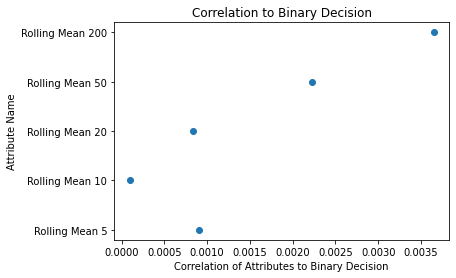

In [6]:
plt.scatter(correlation_stock_fix,correlation_stock_fix.keys())
plt.ylabel("Attribute Name")
plt.xlabel("Correlation of Attributes to Binary Decision")
plt.title("Correlation to Binary Decision")
plt.show()

For some reason I just can't get 'Volume' and 'Binary Decision' to show up in the plot as somewhere their keys are lost:

In [7]:
print(correlation_stock_fix.keys())

Index(['Rolling Mean 5', 'Rolling Mean 10', 'Rolling Mean 20',
       'Rolling Mean 50', 'Rolling Mean 200'],
      dtype='object')


#### (2b) Using Naive Bayes classifier and the most two significant features predict daily return.

In [8]:
naive_bayes_stock = GaussianNB()
print("Length of DF: ", stock_df.shape[0])
test_size = 100/stock_df.shape[0]
print("Percentage of test_size to use last 100 days: ", test_size)
x_stock_train, x_stock_test, y_stock_train, y_stock_test = train_test_split(
    stock_df[[best_stock_attr_fix, second_best_stock_attr_fix]],
    stock_df["Binary Decision"], test_size=test_size,
    shuffle=False, random_state=6)
naive_bayes_stock.fit(x_stock_train, y_stock_train)
test_predictions_stock = naive_bayes_stock.predict(x_stock_test)
accuracy_stock = accuracy_score(y_stock_test, test_predictions_stock)
print("Accuracy for Naive Bayes ", round(accuracy_stock, 3))

Length of DF:  12402
Percentage of test_size to use last 100 days:  0.008063215610385421
Accuracy for Naive Bayes  0.57
